<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Gamma_novo_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas:

import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy.interpolate as interp
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.optimize import curve_fit
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

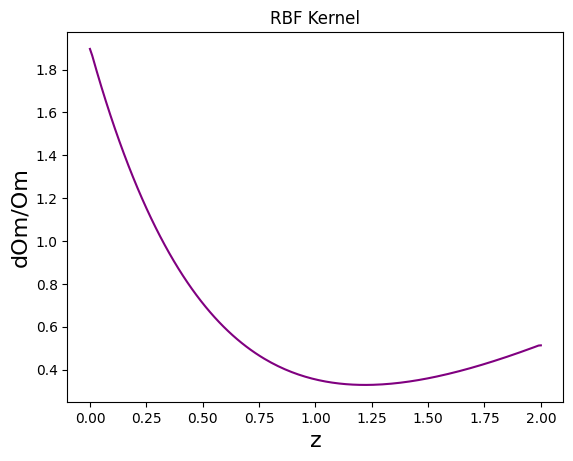

In [6]:
# baixando os dados
data_Hrec = np.genfromtxt('/content/drive/MyDrive/Gamma novo GP/H_recon.csv', delimiter=', ')

z_rec = data_Hrec[:, 0]
H_rec = data_Hrec[:, 1]

sig_H_rec = data_Hrec[:, 2]


# baixando os dados
data_dHrec = np.genfromtxt('/content/drive/MyDrive/Gamma novo GP/dH_recon.csv', delimiter=', ')

dz_rec = data_dHrec[:, 0]
dH_rec = data_dHrec[:, 1]

sig_dH_rec = data_dHrec[:, 2]


dh_h = dH_rec / H_rec

sigma_H = np.sqrt(((dh_h) ** 2) * (((sig_H_rec / H_rec) ** 2) + ((sig_dH_rec / dH_rec) ** 2)))


# definindo Om'/Om
dOm_Om = (3/(1+dz_rec)) - (2*dh_h)
eOm = np.sqrt( (2*sigma_H)**2 )

# plote
plt.plot(dz_rec, dOm_Om, color='purple')
plt.xlabel('z', fontsize=16)
plt.ylabel('dOm/Om', fontsize=16)
plt.title('RBF Kernel')
plt.show()

In [8]:
# baixando os dados
data_frec = np.genfromtxt('/content/drive/MyDrive/Gamma novo GP/f_recon.csv', delimiter=', ')

zf_rec = data_frec[:, 0]
f_rec = data_frec[:, 1]

sig_f_rec = data_frec[:, 2]


# baixando os dados
data_dfrec = np.genfromtxt('/content/drive/MyDrive/Gamma novo GP/df_recon.csv', delimiter=', ')

dzf_rec = data_dfrec[:, 0]
df_rec = data_dfrec[:, 1]

sig_df_rec = data_dfrec[:, 2]


df_f = df_rec / f_rec

sigma_ff = np.sqrt(((df_f) ** 2) * (((sig_f_rec / f_rec) ** 2) + ((sig_df_rec / df_rec) ** 2)))

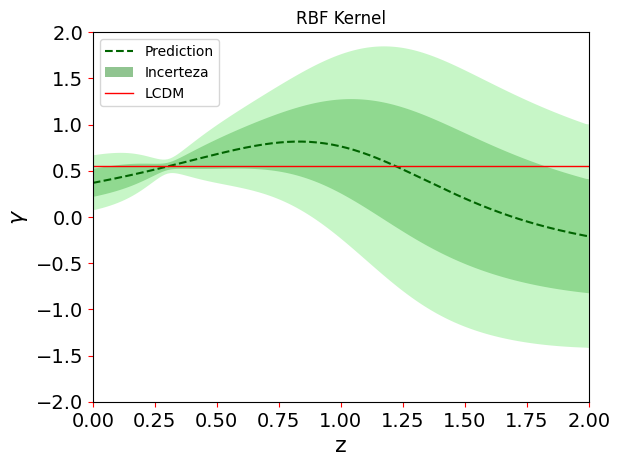

In [12]:
# definindo gamma
gamma_rec = df_f / dOm_Om

sigma_g = np.sqrt( (sigma_ff / dOm_Om )**2 + ( ( (df_f*eOm)/ ((dOm_Om)**2) ) )**2)

fig, ax = plt.subplots()
plt.ylim(-2,2)
plt.xlim(0,2.0)
plt.tick_params(labelsize=14, color='red')
plt.plot(dzf_rec, gamma_rec, color='darkgreen', label='Prediction', linestyle="--")
plt.fill(np.concatenate([dzf_rec, dzf_rec[::-1]]),
         np.concatenate([gamma_rec - 1.0000 * sigma_g,
                        (gamma_rec + 1.0000 * sigma_g)[::-1]]),
         alpha=.5, fc='forestgreen', ec='None', label='Incerteza')
plt.fill(np.concatenate([dzf_rec, dzf_rec[::-1]]),
         np.concatenate([gamma_rec - 1.9600 * sigma_g,
                        (gamma_rec + 1.9600 * sigma_g)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None')
plt.axhline(y=0.55, color='red', linestyle='-', linewidth=1, label='LCDM')


# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('$\gamma$', fontsize=16)
plt.legend(loc='best')
plt.title('RBF Kernel')
#plt.savefig('gamma_RBF.png', format='png', bbox_inches='tight')
plt.show()